## Libraries


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate

## Load Data


In [2]:
df_22 = pd.read_csv('../raw_data/fifa22/players_22.csv')
df_21 = pd.read_csv('../raw_data/fifa22/players_21.csv')
df_20 = pd.read_csv('../raw_data/fifa22/players_20.csv')
df_19 = pd.read_csv('../raw_data/fifa22/players_19.csv')
df_18 = pd.read_csv('../raw_data/fifa22/players_18.csv')
df_17 = pd.read_csv('../raw_data/fifa22/players_17.csv')
df_16 = pd.read_csv('../raw_data/fifa22/players_16.csv')
df_15 = pd.read_csv('../raw_data/fifa22/players_15.csv')

/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_58552/3992483976.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('../raw_data/fifa22/players_22.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_58552/3992483976.py:5: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('../raw_data/fifa22/players_18.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_58552/3992483976.py:7: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df_16 = pd.read_csv('../raw_data/fifa22/players_16.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_58552/3992483976.py:8: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df_15 = pd.read_csv('../raw_data/fifa22/players_15.csv')


In [3]:
to_drop = ['club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url',
           'real_face','nation_jersey_number','nation_position','club_loaned_from','long_name','player_url'
          ,'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
           'rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','club_jersey_number','nationality_id','club_jersey_number',
          'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking' ,'goalkeeping_positioning' ,'goalkeeping_reflexes', 'goalkeeping_speed']



In [4]:
df22 = df_22.drop(to_drop, axis = 1)
df21 = df_21.drop(to_drop, axis = 1)
df20 = df_20.drop(to_drop, axis = 1)
df19 = df_19.drop(to_drop, axis = 1)
df18 = df_18.drop(to_drop, axis = 1)
df17 = df_17.drop(to_drop, axis = 1)
df16 = df_16.drop(to_drop, axis = 1)
df15 = df_15.drop(to_drop, axis = 1)

In [5]:
for index, col in enumerate(df_22.columns):
    print(f"{col:<26} | ", end="")
    if (index % 3 == 2):
        print("\n", end="")

sofifa_id                  | player_url                 | short_name                 | 
long_name                  | player_positions           | overall                    | 
potential                  | value_eur                  | wage_eur                   | 
age                        | dob                        | height_cm                  | 
weight_kg                  | club_team_id               | club_name                  | 
league_name                | league_level               | club_position              | 
club_jersey_number         | club_loaned_from           | club_joined                | 
club_contract_valid_until  | nationality_id             | nationality_name           | 
nation_team_id             | nation_position            | nation_jersey_number       | 
preferred_foot             | weak_foot                  | skill_moves                | 
international_reputation   | work_rate                  | body_type                  | 
real_face                  | rel

### Target Variable hist

In [143]:
min(np.log(df22['value_eur']))

9.104979856318357

(array([1.7141e+04, 4.8300e+02, 1.2700e+02, 4.3000e+01, 1.9000e+01,
        1.5000e+01, 9.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([2.000000e+03, 1.185180e+07, 2.370160e+07, 3.555140e+07,
        4.740120e+07, 5.925100e+07, 7.110080e+07, 8.295060e+07,
        9.480040e+07, 1.066502e+08, 1.185000e+08]),
 <BarContainer object of 10 artists>)

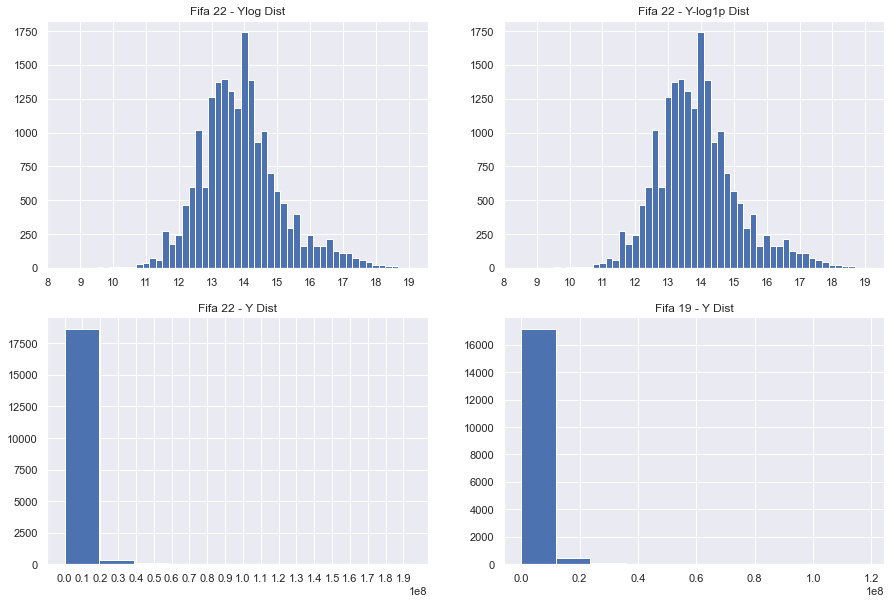

In [146]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title('Fifa 22 - Ylog Dist')
plt.hist(np.log(df22['value_eur']),bins= 50)
plt.xticks(np.arange(8, 20, step=1))

# [df22['value_eur']< 30000000]

plt.subplot(2, 2, 2)
plt.title('Fifa 22 - Y-log1p Dist')
plt.hist(np.log1p(df22['value_eur']),bins= 50)
plt.xticks(np.arange(8, 20, step=1))

plt.subplot(2, 2, 3)
plt.title('Fifa 22 - Y Dist')
plt.hist(df22['value_eur'])
plt.xticks(np.arange(0, 200000000, step=10000000))

plt.subplot(2, 2, 4)
plt.title('Fifa 19 - Y Dist')
plt.hist(df19['value_eur'])

## Feature Engineering

### Age

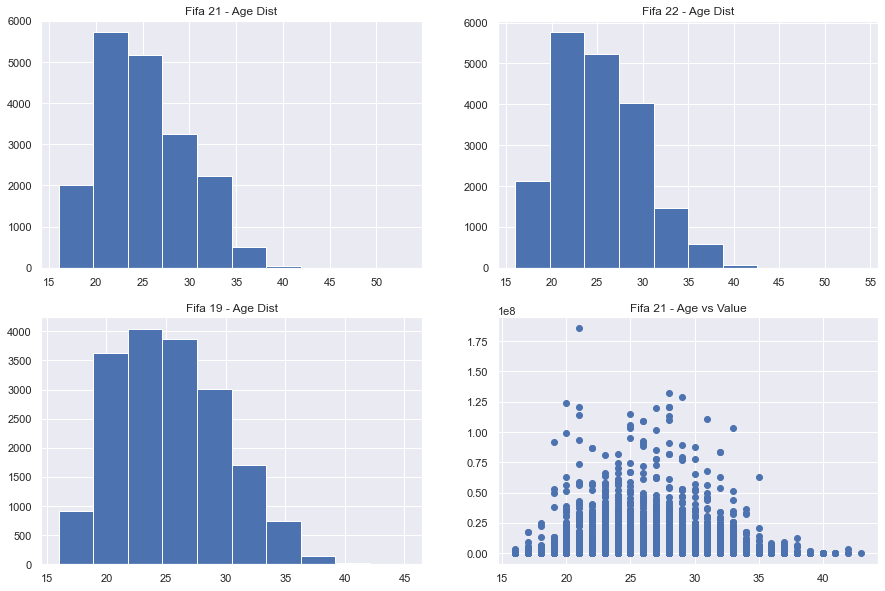

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title('Fifa 21 - Age Dist')
plt.hist(df21['age'])

plt.subplot(2, 2, 2)
plt.title('Fifa 22 - Age Dist')
plt.hist(df22['age'])

plt.subplot(2, 2, 3)
plt.title('Fifa 19 - Age Dist')
plt.hist(df19['age'])

plt.subplot(2, 2, 4)
plt.title('Fifa 21 - Age vs Value')
plt.scatter(df21['age'],df21['value_eur'])

Age : bins of [15-19] ,[20-24], [25-29],[30-35], over 35

In [18]:
def age_bins(a):
    if a <= 19:
        return 'Below 20'
    if 20 <= a <= 24:
        return '20-24'
    if 25 <= a <= 29:
        return '25-29'
    if 30 <= a <= 34:
        return '30-34'
    if a >= 35:
        return 'Over 34'



In [19]:
dfs = [df18, df19, df20, df21,df22,df17,df16,df15]

for frame in dfs:
    frame['age_bin'] = frame['age'].apply(age_bins)

In [21]:
df22[['age','age_bin']].head(50)

,age,age_bin
0,34,30-34
1,32,30-34
2,36,Over 34
3,29,25-29
4,30,30-34
5,28,25-29
6,22,20-24
7,35,Over 34
8,29,25-29
9,27,25-29


### Nationalities

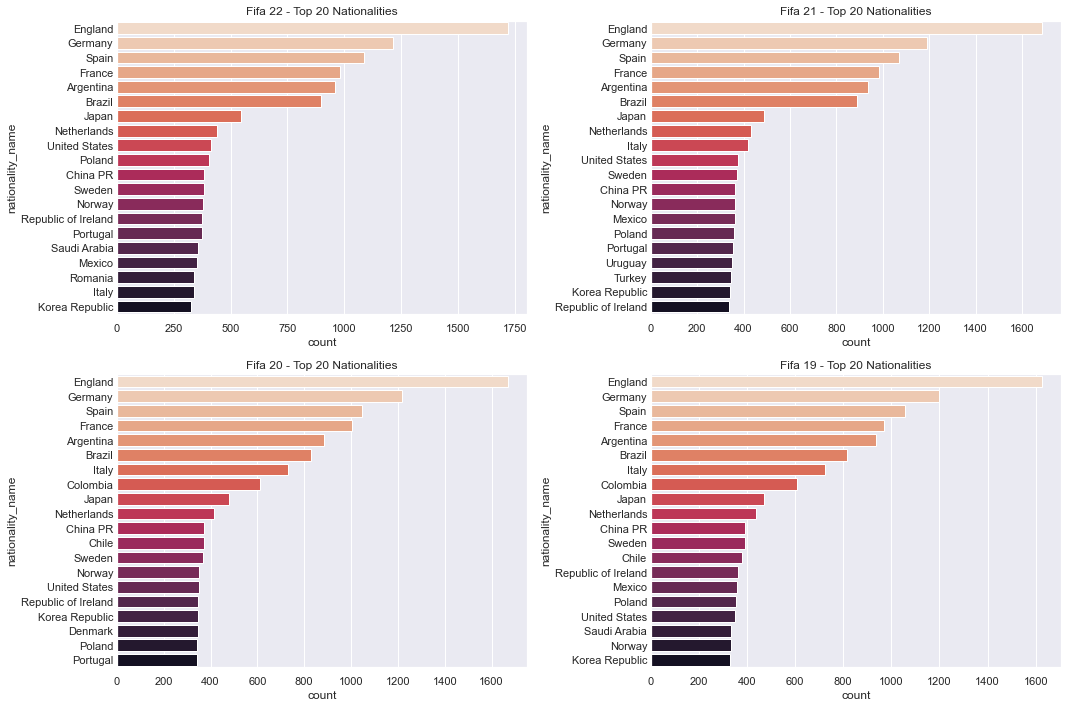

In [34]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title('Fifa 22 - Top 20 Nationalities')
ax = sns.countplot(y=df22.nationality_name, order=df22.nationality_name.value_counts().iloc[:20].index, palette='rocket_r')
ax.tick_params(axis='y', length=0)

plt.subplot(2, 2, 2)
plt.title('Fifa 21 - Top 20 Nationalities')
ax = sns.countplot(y=df21.nationality_name, order=df21.nationality_name.value_counts().iloc[:20].index, palette='rocket_r')
ax.tick_params(axis='y', length=0)

plt.subplot(2, 2, 3)
plt.title('Fifa 20 - Top 20 Nationalities')
ax = sns.countplot(y=df20.nationality_name, order=df20.nationality_name.value_counts().iloc[:20].index, palette='rocket_r')
ax.tick_params(axis='y', length=0)

plt.subplot(2, 2, 4)
plt.title('Fifa 19 - Top 20 Nationalities')
ax = sns.countplot(y=df19.nationality_name, order=df19.nationality_name.value_counts().iloc[:20].index, palette='rocket_r')
ax.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

In [36]:
list(df22.nationality_name.value_counts().iloc[:20].index)

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Japan',
 'Netherlands',
 'United States',
 'Poland',
 'China PR',
 'Sweden',
 'Norway',
 'Republic of Ireland',
 'Portugal',
 'Saudi Arabia',
 'Mexico',
 'Romania',
 'Italy',
 'Korea Republic']

In [39]:
def top_nationality(val):
    top_nat = list(df22.nationality_name.value_counts().iloc[:20].index)
    if val not in top_nat:
        return 'Others'
    return val

In [41]:
dfs = [df19, df20, df21,df22]

for frame in dfs:
    frame['new_nationality'] = frame['nationality_name'].apply(top_nationality)

In [147]:
df22[['nationality_name','new_nationality']].value_counts()

nationality_name  new_nationality
England           England            1719
Germany           Germany            1214
Spain             Spain              1086
France            France              980
Argentina         Argentina           960
                                     ... 
Guam              Others                1
Mauritius         Others                1
Indonesia         Others                1
Kyrgyzstan        Others                1
Afghanistan       Others                1
Length: 163, dtype: int64

### Team Metrics

Idea is to get average metrcis that could explain the team performance impact on overall/eur_value.
When grouping by team_ids and checking the avg ratings/stats per positions
- Average overall rating/value_eur/potential of the team 
- Average overall rating/value_eur/potential of the team by positions
- Average overall rating/value_eur/potential of the starting team ( or add the players that played most by position)


In [48]:
df21.groupby(['club_name'])[['value_eur','overall','potential']].mean()

,value_eur,overall,potential
club_name,,,
1. FC Heidenheim 1846,1.349333e+06,66.266667,71.433333
1. FC Kaiserslautern,8.403571e+05,62.785714,68.821429
1. FC Köln,4.252500e+06,70.266667,76.700000
1. FC Magdeburg,6.175926e+05,62.074074,68.000000
1. FC Nürnberg,1.790500e+06,66.833333,72.866667
...,...,...,...
Örebro SK,5.523077e+05,60.884615,65.692308
Östersunds FK,5.520370e+05,60.814815,66.259259
İstanbul Başakşehir FK,4.541667e+06,71.433333,74.466667


In [49]:
pos21 = df21['player_positions']
pref_pos_21 = []
for i in pos21:
    a = i.split(',')
    pref_pos_21.append(a[0])
df21['prefered_pos'] = pref_pos_21

df21.prefered_pos.value_counts()

CB     3252
ST     2645
CM     2241
GK     2084
CDM    1514
LB     1402
RB     1363
CAM    1148
LM     1069
RM     1065
RW      438
LW      420
CF      115
LWB     100
RWB      88
Name: prefered_pos, dtype: int64

In [58]:
def play_pos(a):
    if a in ('ST','CF','RF','LF','RW','LW'):
        return 'ATT'
    if a in ('RM','LM','CAM','CDM','CM','LWB','RWB'):
        return 'MID'
    if a in ('CB','CF','LB','RB'):
        return 'DEF'
    return a

In [83]:
def is_bench(d):
    if d in ("SUB", "RES", ""):
        return True 
    return False

In [84]:
df21['player_pos']= df21['prefered_pos'].apply(play_pos)
df21['is_bench']= df21['club_position'].apply(is_bench)


In [60]:
test = df21.groupby(['club_name','player_pos'])[['value_eur','overall','potential']].mean()
test

value_eur    overall  potential
club_name                 player_pos                                    
1. FC Heidenheim 1846     ATT         1.287500e+06  65.666667  70.333333
                          DEF         1.789286e+06  68.571429  73.142857
                          GK          8.825000e+05  63.250000  71.000000
                          MID         1.284615e+06  66.230769  71.153846
1. FC Kaiserslautern      ATT         9.062500e+05  65.000000  67.500000
...                                            ...        ...        ...
İttifak Holding Konyaspor MID         2.015909e+06  69.000000  72.181818
Śląsk Wrocław             ATT         9.833333e+05  62.000000  72.000000
                          DEF         7.711111e+05  65.111111  67.555556
                          GK          3.025000e+05  65.500000  67.000000
                          MID         6.550000e+05  61.692308  69.000000

[2722 rows x 3 columns]

In [80]:
test_df = test.reset_index() \
    .pivot(index='club_name',columns='player_pos',values=['value_eur','overall','potential'])
    
test_df = test_df.reset_index()
test_df.columns = list(map("_".join, test_df.columns))
test_df = test_df.rename(columns={"club_name_": "club_name"})
test_df.columns

Index(['club_name', 'value_eur_ATT', 'value_eur_DEF', 'value_eur_GK',
       'value_eur_MID', 'overall_ATT', 'overall_DEF', 'overall_GK',
       'overall_MID', 'potential_ATT', 'potential_DEF', 'potential_GK',
       'potential_MID'],
      dtype='object')

In [118]:
test_bench = df21[df21['is_bench']==False].groupby(['club_name','player_pos'])[['value_eur','overall','potential']].mean()
# test_bench

In [119]:
test_bench = test_bench.reset_index() \
    .pivot(index='club_name',columns='player_pos',values=['value_eur','overall','potential']) \
    .reset_index()

test_bench.columns = list(map("_".join, test_bench.columns))
test_bench = test_bench.add_suffix('_start')
test_bench = test_bench.rename(columns={"club_name__start": "club_name"})
test_bench

,club_name,value_eur_ATT_start,value_eur_DEF_start,value_eur_GK_start,value_eur_MID_start,overall_ATT_start,overall_DEF_start,overall_GK_start,overall_MID_start,potential_ATT_start,potential_DEF_start,potential_GK_start,potential_MID_start
0,1. FC Heidenheim 1846,1200000.0,2.175000e+06,2100000.0,1.555000e+06,67.0,71.500000,73.0,70.000000,68.0,73.500000,73.0,70.600000
1,1. FC Kaiserslautern,937500.0,1.250000e+06,1100000.0,1.100000e+06,64.5,68.000000,64.0,65.400000,68.5,69.666667,72.0,69.400000
2,1. FC Köln,7500000.0,5.700000e+06,10500000.0,7.100000e+06,76.0,72.750000,77.0,73.000000,76.0,77.750000,80.0,80.200000
3,1. FC Magdeburg,650000.0,8.687500e+05,1000000.0,5.562500e+05,65.0,64.750000,66.0,63.750000,65.0,69.000000,71.0,66.250000
4,1. FC Nürnberg,1200000.0,2.118750e+06,2000000.0,3.575000e+06,68.0,68.750000,72.0,68.800000,68.0,74.000000,74.0,76.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Örebro SK,662500.0,6.750000e+05,925000.0,9.875000e+05,64.0,64.000000,68.0,65.500000,64.0,66.750000,69.0,69.250000
677,Östersunds FK,NaN,6.083333e+05,275000.0,7.285714e+05,NaN,62.333333,66.0,61.857143,NaN,67.000000,66.0,68.142857
678,İstanbul Başakşehir FK,1000000.0,4.675000e+06,5500000.0,1.106000e+07,72.0,76.250000,77.0,75.600000,72.0,76.250000,77.0,76.800000
679,İttifak Holding Konyaspor,1000000.0,1.462500e+06,625000.0,2.480000e+06,67.0,70.500000,75.0,71.200000,67.0,70.500000,75.0,72.000000
